# Importing Libraries

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random
from termcolor import colored

# Pre-installing Required Functions

In [2]:
color_generator = lambda n: list(
    map(lambda i: "#" + "%06X" % np.random.randint(0, 0xFFFFFF), range(n)))

# Making Predictions

In [3]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

In [4]:
def forward(x):
    y = w * x + b
    return y

In [5]:
x = torch.tensor(2)
print(forward(x))

tensor(7., grad_fn=<AddBackward0>)


In [6]:
x = torch.tensor([[4], [7]])
print(forward(x))

tensor([[13.],
        [22.]], grad_fn=<AddBackward0>)


# Linear Class

In [7]:
torch.manual_seed(1)
model = nn.Linear(in_features=1, out_features=1)
print(model.weight, model.bias)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [8]:
x = torch.tensor([2.0])
print(model(x))

tensor([0.5891], grad_fn=<AddBackward0>)


In [9]:
x = torch.tensor([[2.0], [3.3]])
print(model(x))

tensor([[0.5891],
        [1.2590]], grad_fn=<AddmmBackward0>)


# Custom Modules

In [10]:
class LR(nn.Module):

    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        pred = self.linear(x)
        return pred

In [11]:
torch.manual_seed(1)
model = LR(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [12]:
print(model.parameters())

<generator object Module.parameters at 0x1217ec040>


In [13]:
x = torch.tensor([1.0])
print(model.forward(x))

tensor([0.0739], grad_fn=<AddBackward0>)


In [14]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


# Creating Dataset

In [15]:
X = torch.randn(100, 1)
print(X[::10])

tensor([[-0.6540],
        [-0.2223],
        [-0.6629],
        [-0.7984],
        [-0.1578],
        [ 0.7626],
        [-3.3312],
        [ 0.9837],
        [-0.6540],
        [ 1.2466]])


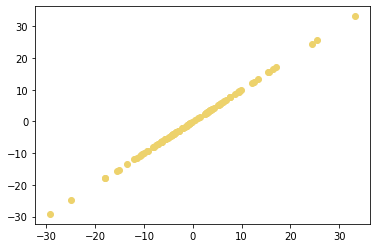

In [16]:
X = torch.randn(100, 1) * 10
y = X
colors = color_generator(1)
plt.plot(X.numpy(), y.numpy(), 'o', c=colors[0])

Text(0.5, 0, 'X')

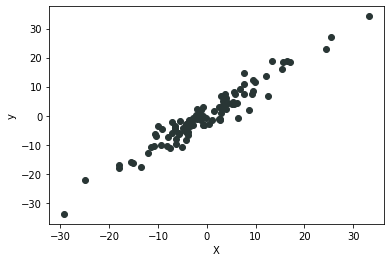

In [17]:
y = X + 3 * torch.randn(100, 1)
colors = color_generator(1)
plt.plot(X.numpy(), y.numpy(), 'o', c=colors[0])
plt.ylabel('y')
plt.xlabel('X')

In [18]:
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [19]:
[w, b] = model.parameters()
print([w, b])

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [20]:
w1 = w[0][0]
b1 = b[0]
print(w1, b1)

tensor(0.5153, grad_fn=<SelectBackward0>) tensor(-0.4414, grad_fn=<SelectBackward0>)


In [21]:
w1 = w[0][0].item()
b1 = b[0].item()
print(w1, b1)

0.5152631998062134 -0.44137823581695557


In [22]:
def get_params():
    return (w[0][0].item(), b[0].item())

In [23]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1 * x1 + b1
    plt.plot(x1, y1, 'r')
    colors = color_generator(1)
    plt.scatter(X, y, color=colors[0])
    plt.show()

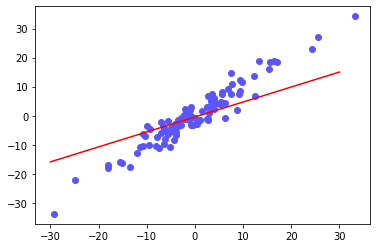

In [24]:
plot_fit("Initial Model")

# Training - Code Implementation

In [25]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0002)

In [26]:
print(criterion)

MSELoss()


In [27]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 0.0002
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [28]:
epochs = 100
losses = []
termcolors = [
    'grey', 'red', 'green', 'yellow', 'blue', 'magenta', 'cyan', 'white'
]
font_colors = random.choices(termcolors, k=2)
for i in range(epochs):
    i += 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    if i == 1 or i % 10 == 0:
        print(colored("epoch:", font_colors[0], attrs=['bold']), i,
              colored("loss:", font_colors[1]), loss.item())
        print(colored("weight:", font_colors[1]),
              list(model.parameters())[0][0][0].item(),
              colored("bias:", font_colors[1]),
              list(model.parameters())[1][0].item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 1 loss: 31.370759963989258
weight: 0.5152631998062134 bias: -0.44137823581695557
epoch: 10 loss: 19.787769317626953
weight: 0.6603131890296936 bias: -0.43947920203208923
epoch: 20 loss: 13.570121765136719
weight: 0.7721915245056152 bias: -0.4372389316558838
epoch: 30 loss: 10.692390441894531
weight: 0.8482838273048401 bias: -0.43490734696388245
epoch: 40 loss: 9.35955810546875
weight: 0.9000375866889954 bias: -0.4325169026851654
epoch: 50 loss: 8.741348266601562
weight: 0.9352383017539978 bias: -0.43008965253829956
epoch: 60 loss: 8.453701972961426
weight: 0.9591810703277588 bias: -0.42764049768447876
epoch: 70 loss: 8.31897258758545
weight: 0.9754672646522522 bias: -0.4251796305179596
epoch: 80 loss: 8.254988670349121
weight: 0.9865458011627197 bias: -0.4227140545845032
epoch: 90 loss: 8.223743438720703
weight: 0.9940826296806335 bias: -0.4202483892440796
epoch: 100 loss: 8.207653045654297
weight: 0.9992108345031738 bias: -0.41778576374053955


Text(0.5, 0, 'Epoch')

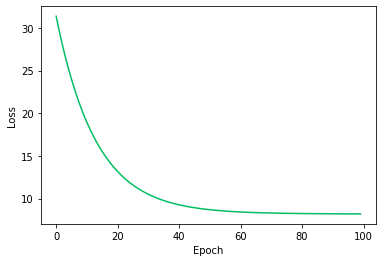

In [29]:
colors = color_generator(1)
plt.plot(range(epochs), losses, c=colors[0])
plt.ylabel('Loss')
plt.xlabel('Epoch')

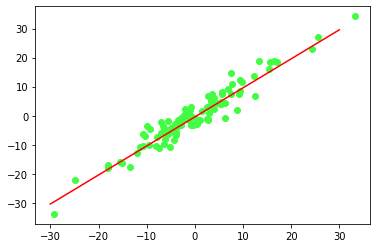

In [30]:
plot_fit("Trained Model")